In [79]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix

In [66]:
"""Importación del dataset, la función pandas read_csv()se usa 
    para leer un archivo CSV en un marco de datos. 
    """
data_df= pd.read_csv('winequality.csv')
print("Dataset importado: ", data_df.head(5))

Dataset importado:     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


In [67]:
 """Función para separar los datos del dataset, además se escogen las características para realizar la predicción"""
    
caracteristicas = ['fixed acidity','volatile acidity','citric acid','residual sugar',
                       'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
x = data_df[caracteristicas]
"""separar la columna con los valores a predecir"""
y = data_df['quality']
print ("Dataset separando:\n\n", x, y, sep ='\n\n')

Dataset separando:



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

     

In [83]:
"""División de el conjunto de datos en una proporción de entrenamiento y de prueba (70:30)"""
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [84]:
"""crear un objeto clasificador del árbol de decisiones"""
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
"""Entrena el clasificador del árbol de decisiones"""
clf = clf.fit(X_train,y_train)
"""predecir la respuesta para el conjunto de datos de prueba"""
y_pred = clf.predict(X_test)


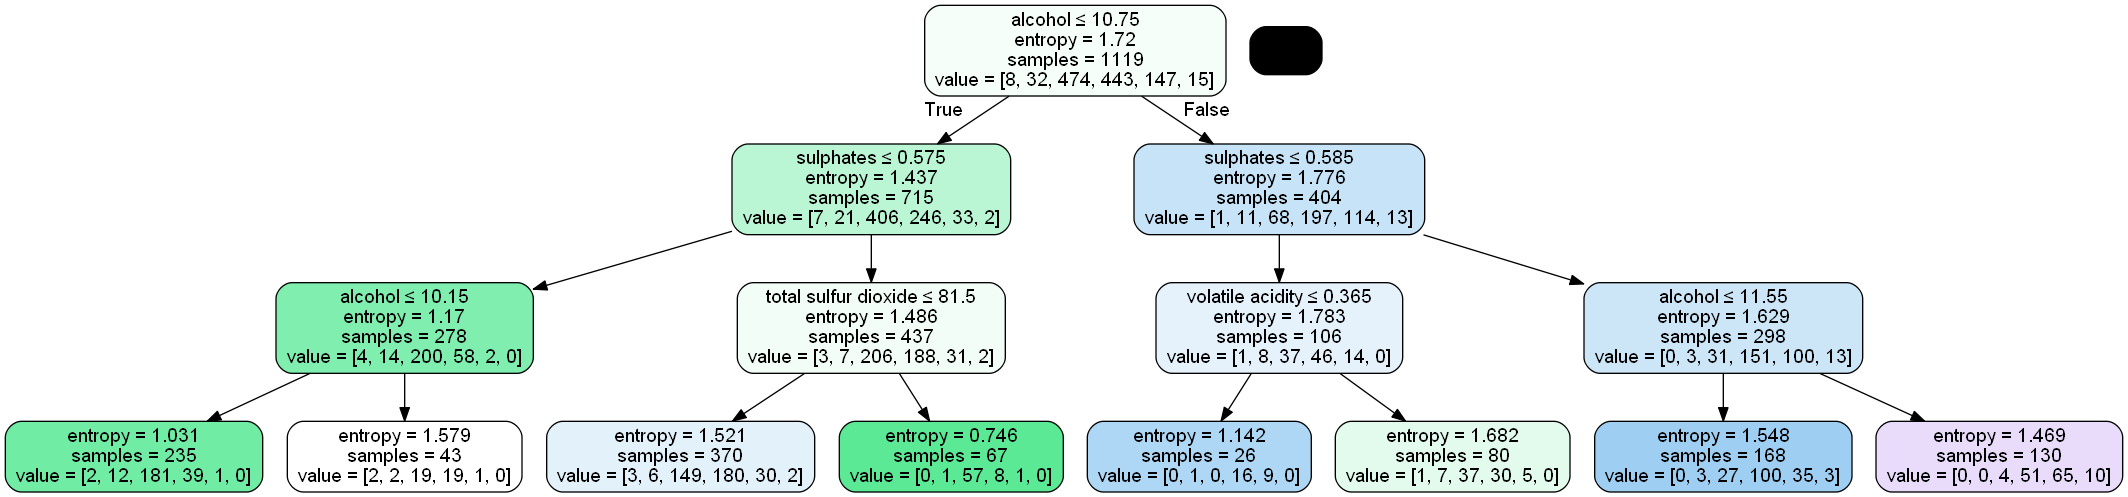

In [85]:
"""visualizar árbol de decisiones"""
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = caracteristicas)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

## Matriz de confusión

<IPython.core.display.Javascript object>


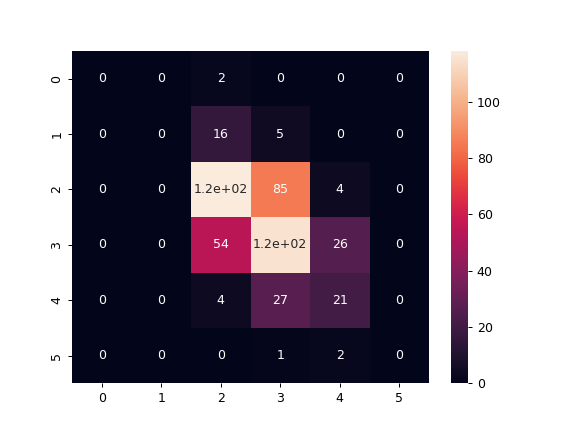

In [87]:
"""Mariz de confusión"""
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)
pl.show()

## MÉTRICAS DE RENDIMIENTO

In [91]:
print("MÉTRICAS DE RENDIMIENTO \n")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

MÉTRICAS DE RENDIMIENTO 

Accuracy: 0.5291666666666667
Precision: 0.2496726782557348
Recall: 0.26060634212808126
